In [48]:
import httpx
from selectolax.parser import HTMLParser
import pandas as pd
import numpy as np
from io import StringIO
from matplotlib import pyplot as plt
from matplotlib import colors as mcol
from matplotlib import rc
from matplotlib import cm
import os

current_path = os.getcwd()

In [49]:
current_path

'/home/jamesbuchanan/Documents/coding-projects/met-office-weather-scraping/scripts'

In [50]:
df_met = pd.read_csv('/home/jamesbuchanan/Documents/coding-projects/met-office-weather-scraping/data/combined_data.csv')


In [51]:
df_met = (df_met
    .rename(columns = {
        'yyyy': 'year',
        'mm': 'month',
        'tmax': 'max_temp',
        'tmin': 'min_temp',
        'af': 'air_frost_days',
        'rain': 'rainfall',
        'sun': 'sun_hours'
        })
    .assign(
        year = (
            lambda df_: df_['year'].astype(int).astype(str)
            ),
        month = (
            lambda df_: df_['month'].astype(str)
            ),
        max_temp = (
            lambda df_: df_['max_temp'].str.replace('*', '').astype('float16')
            ),
        min_temp = (
            lambda df_: df_['min_temp'].str.replace('*', '').astype('float16')
            )
        )
)

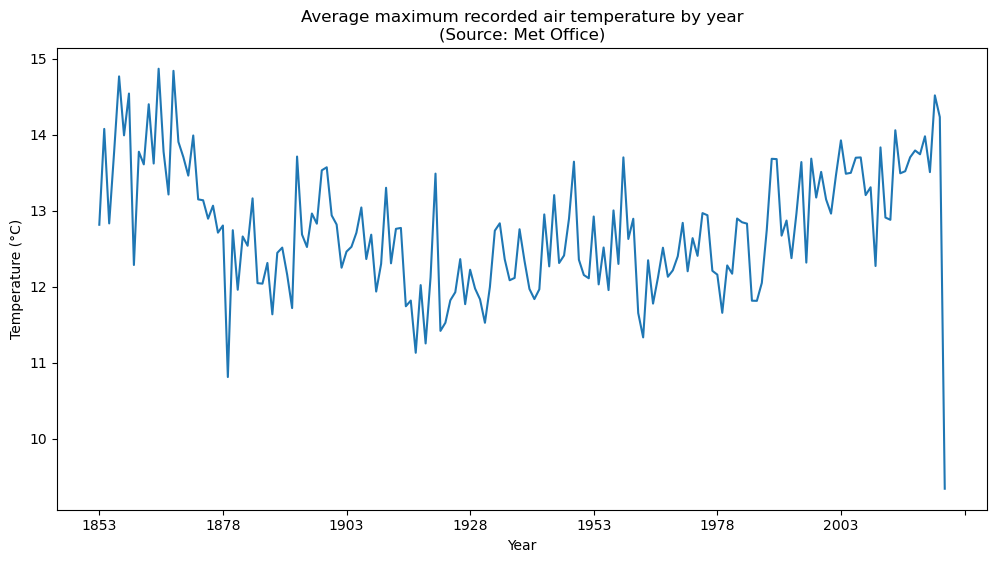

In [71]:
plt.figure(figsize = (12, 6))

ax = (df_met
    .groupby('year')
    ['max_temp']
    .mean()
    .plot()
)

ax.set_title('Average maximum recorded air temperature by year\n(Source: Met Office)')
ax.legend().set_visible(False)
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (°C)')

plt.show()